In [223]:
# packages
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [224]:
# import du csv
data = pd.read_csv('heart.csv')

In [225]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0    1   0     125.0   212    0        1      168      0      1.0   
1     53.0    1   0     140.0   203    1        0      155      1      3.1   
2     70.0    1   0       NaN   174    0        1      125      1      2.6   
3     61.0    1   0     148.0   203    0        1      161      0      0.0   
4     62.0    0   0     138.0   294    1        1      106      0      1.9   
...    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020  59.0    1   1     140.0   221    0        1      164      1      0.0   
1021  60.0    1   0     125.0   258    0        0      141      1      2.8   
1022  47.0    1   0     110.0   275    0        0      118      1      1.0   
1023  50.0    0   0     110.0   254    0        0      159      0      0.0   
1024  54.0    1   0     120.0   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [226]:
stat_analysis = ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

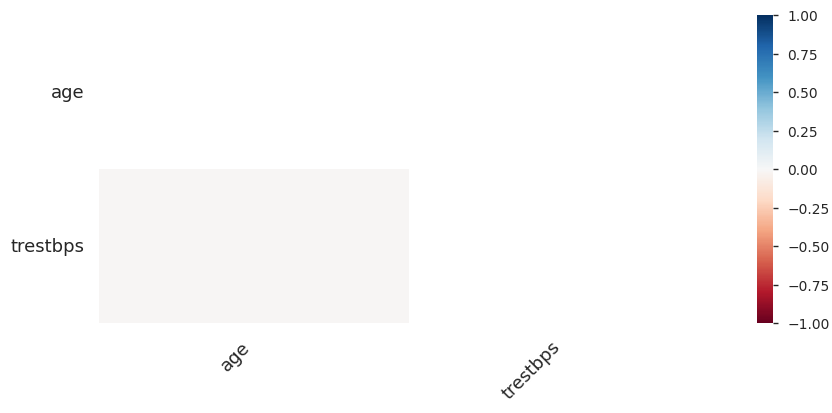

In [227]:
stat_analysis

In [228]:
# Count des valeurs
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [229]:
# Suppression des doublons
data.drop_duplicates()

# Suppression des NaaN
data.dropna(inplace=True)



In [230]:
stat_analysis = ProfileReport(data)
stat_analysis



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [231]:
data['target'].value_counts()

target
1    520
0    481
Name: count, dtype: int64

In [232]:
data['age'] = data['age'].astype(int)
data['trestbps'] = data['trestbps'].astype(int)

In [233]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
5      58    0   0       100   248    0        0      122      0      1.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
5         1   0     2       1  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1001 rows x 14 columns]

### Decision tree

In [261]:
# Définition du modèles
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# Split test/train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Appel de l'abre de décision
clf = DecisionTreeClassifier()



# Ajustement des doonées
clf = clf.fit(X_train, Y_train)


# Estimation du test
estimate = clf.predict_proba(X_test)[:,1]


true = Y_test
# build AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)

print(abs(estimate - true).mean())
print(abs(estimate - true).std())


0.01195219123505976
0.10888789512695743


In [235]:
print(auc_)

0.9289855995922008


L'AUC est proche de 1 ce qui est satisfaisant.

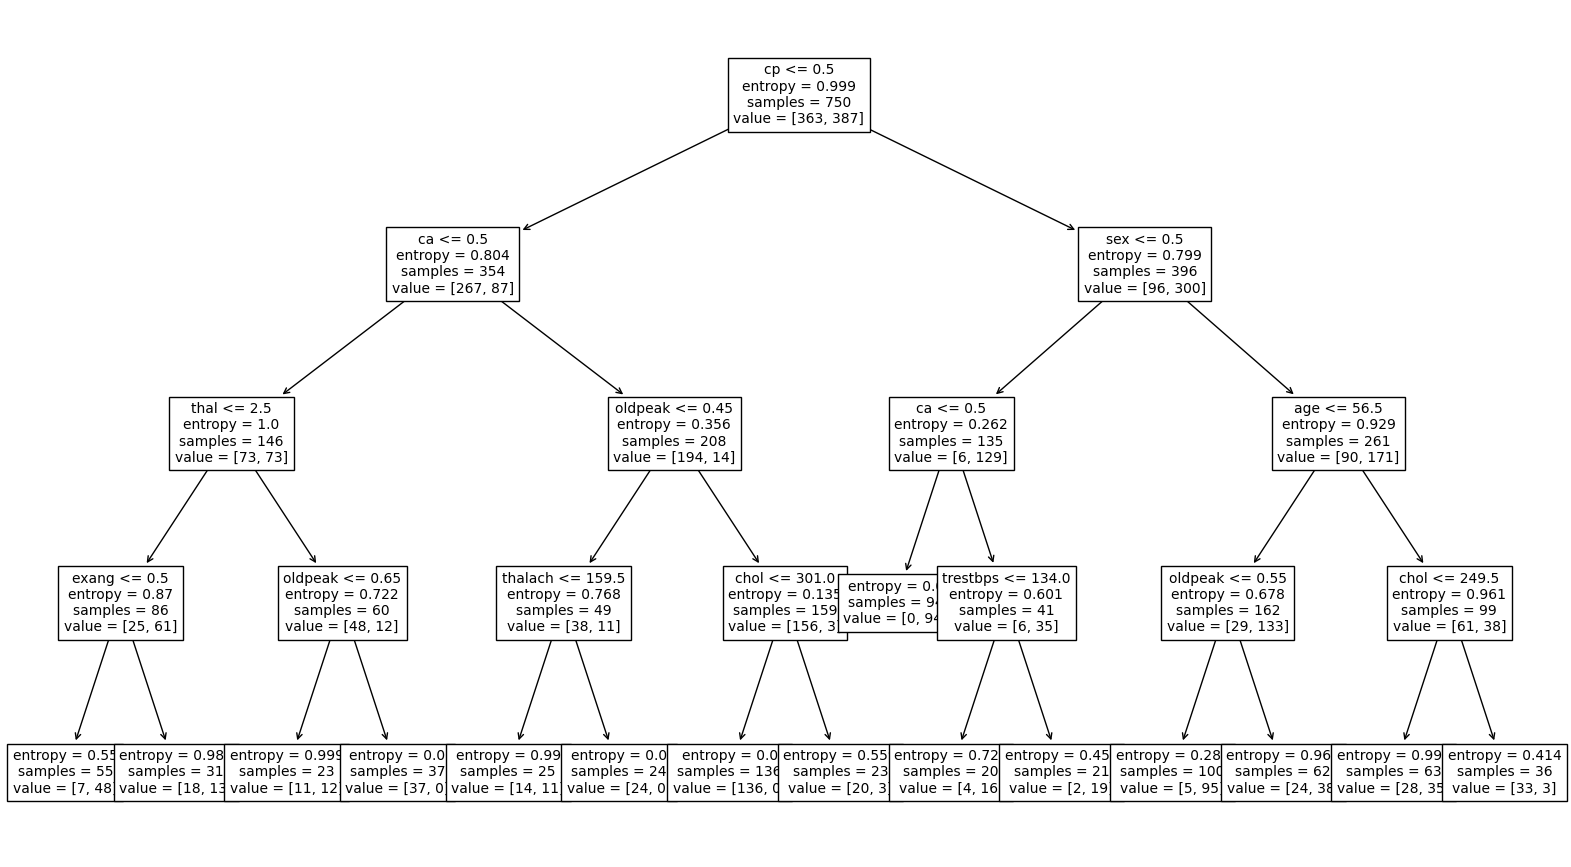

In [259]:
plt.figure(figsize=(20,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

[Text(0.5089285714285714, 0.9, 'x[2] <= 0.5\nentropy = 0.999\nsamples = 750\nvalue = [363, 387]'),
 Text(0.2857142857142857, 0.7, 'x[11] <= 0.5\nentropy = 0.804\nsamples = 354\nvalue = [267, 87]'),
 Text(0.14285714285714285, 0.5, 'x[12] <= 2.5\nentropy = 1.0\nsamples = 146\nvalue = [73, 73]'),
 Text(0.07142857142857142, 0.3, 'x[8] <= 0.5\nentropy = 0.87\nsamples = 86\nvalue = [25, 61]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.55\nsamples = 55\nvalue = [7, 48]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.981\nsamples = 31\nvalue = [18, 13]'),
 Text(0.21428571428571427, 0.3, 'x[9] <= 0.65\nentropy = 0.722\nsamples = 60\nvalue = [48, 12]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.999\nsamples = 23\nvalue = [11, 12]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.42857142857142855, 0.5, 'x[9] <= 0.45\nentropy = 0.356\nsamples = 208\nvalue = [194, 14]'),
 Text(0.35714285714285715, 0.3, 'x[7] <= 159.5\nentropy = 0.768\nsamples = 49\nvalue = [38, 11]

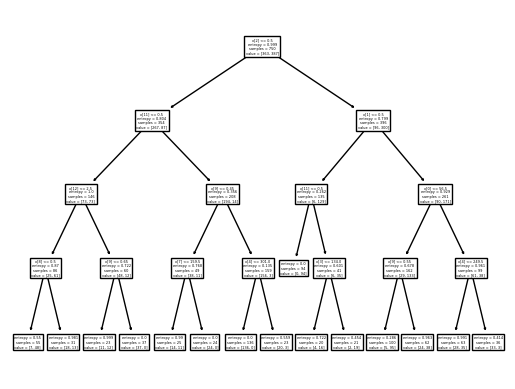

In [237]:
plot_tree(clf)

In [239]:
# Hyperparameters space
param_space = {
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(2, 5, 1)),
    'min_samples_split': [10,20,30,40],
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_leaf_nodes': [10, 20, 30]
}


# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=15)
# running search
grid_search_tree.fit(X, Y.values)

# Meilleur modèle
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}
best auc: 0.934919308632544


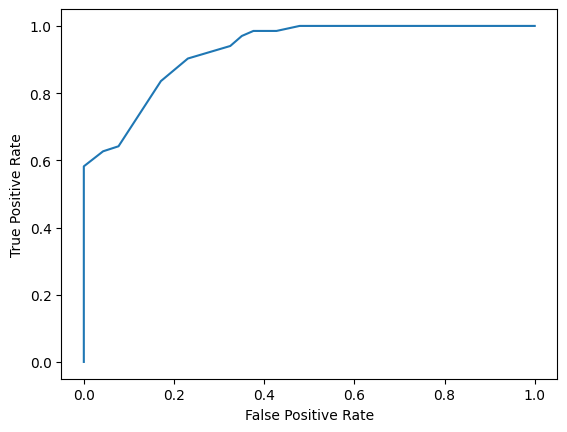

In [240]:
# Appel de la classification
clf_best = DecisionTreeClassifier(
    criterion= 'entropy',
    max_depth = 4,
    max_leaf_nodes = 20, 
    min_samples_leaf = 20,
    min_samples_split = 20)

# Définition des variable
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# running search
clf_best.fit(X_train, Y_train)

# prediction
estimate_best = clf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,  estimate_best)
# Roc Curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [260]:
# creating features importance serie
feature_scores = pd.Series(clf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

ca          0.230409
thal        0.175492
exang       0.156848
oldpeak     0.098875
slope       0.096139
thalach     0.081119
trestbps    0.056247
chol        0.031793
cp          0.028488
sex         0.018885
age         0.016608
restecg     0.006062
fbs         0.003035
dtype: float64

In [241]:
# auc
print(auc(fpr,tpr))



0.9279882638091592


L’AUC ROC de notre modèle se situe bien au-dessus de celui d’un modèle non-informatif et en-dessous de celui d’un modèle parfait. Avec 73% d’AUC ROC, il s’agit d’un modèle assez performant.

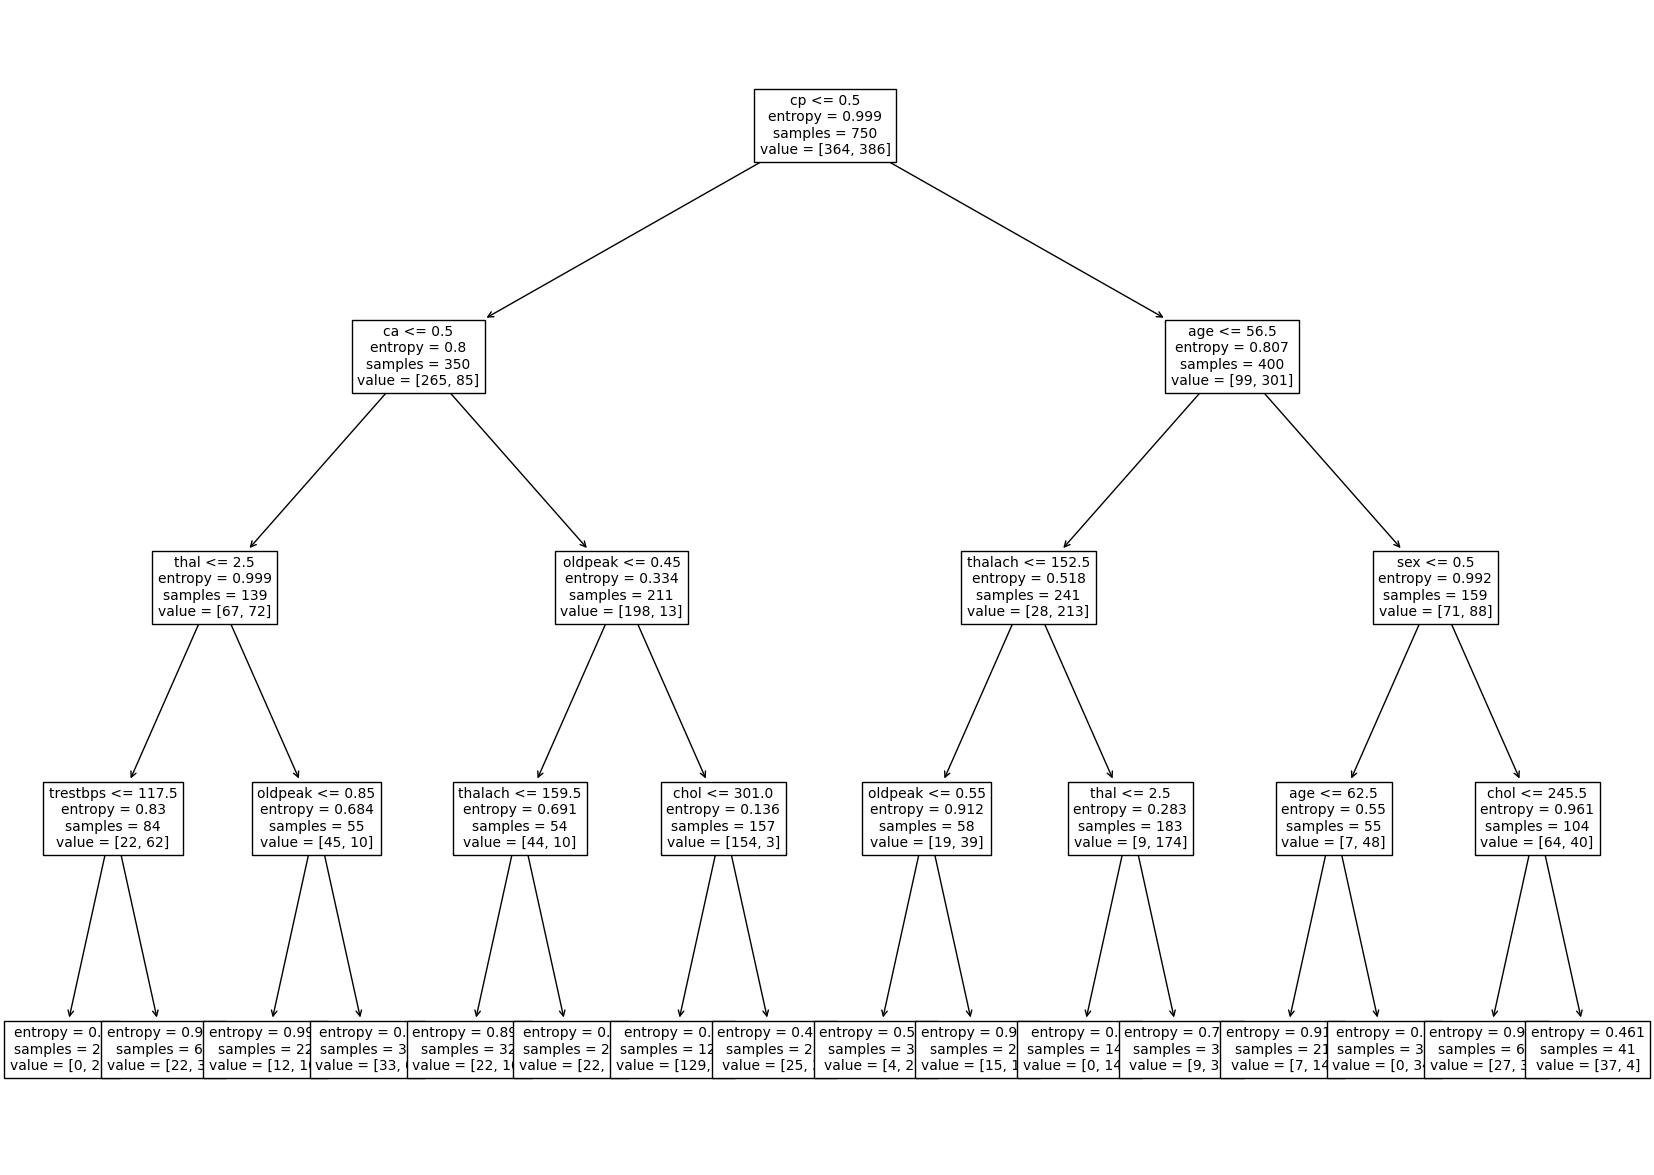

In [242]:
# plotting tree
plt.figure(figsize=(21,15))
plot_tree(clf_best, feature_names = list(X_train.columns), fontsize=10)
plt.show()

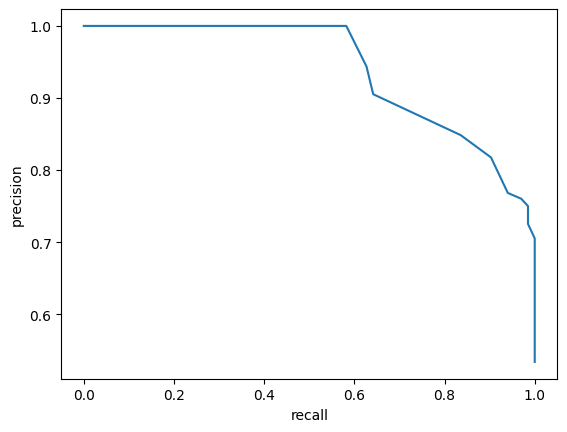

In [243]:
precision, recall, _ = precision_recall_curve(Y_test,  estimate_best)

# getting pr curve

plt.plot(recall, precision)

plt.ylabel('precision')
plt.xlabel('recall')
plt.show()


### Logistic regression

In [244]:
# calling classifier
clf_lr = LogisticRegression()

# fitting on data
clf_lr = clf_lr.fit(X_train, Y_train)
# estimating on test
estimate_lr = clf_lr.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate_lr)
auc_lr = auc(fpr, tpr)

print(auc_lr) 

0.920142875366756


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [263]:
# Hyperparameters space
param_space = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.1, 1, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept': [True, False],
    'max_iter': [100, 200],
}


# calling classifier
clf_grid = LogisticRegression(solver='liblinear')

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=15)
# running search
grid_search_tree.fit(X, Y.values)

# Meilleur modèle
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

best parameters: {'C': 100, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
best auc: 0.9162014578558697


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


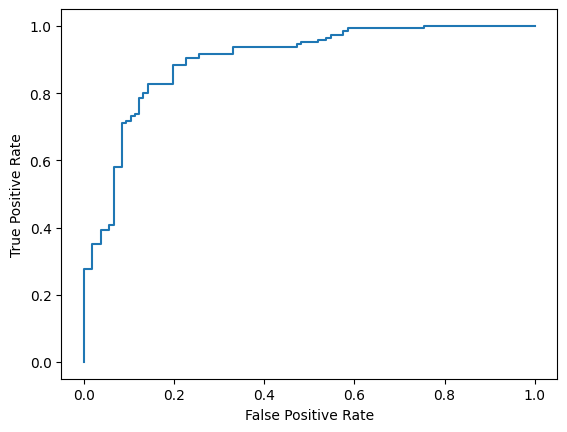

In [264]:
# Appel de la classification
clf_best = LogisticRegression(C = 100, fit_intercept = True, max_iter = 200, penalty = 'l2', solver = 'lbfgs')

# Définition des variable
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# running search
clf_best.fit(X_train, Y_train)

# prediction
estimate_best = clf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,  estimate_best)
# Roc Curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

# Définition du modèle Random Forest
clf_rf = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 4, n_estimators = 4)

# Split test/train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Ajustement des données
clf_rf.fit(X_train, Y_train)

# Prédiction des probabilités pour la classe positive
estimate_rf = clf_rf.predict_proba(X_test)[:, 1]

# Calcul de l'AUC
fpr_rf, tpr_rf, _ = roc_curve(Y_test, estimate_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Autres métriques d'évaluation
predictions_rf = clf_rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions_rf))
print("Classification Report:\n", classification_report(Y_test, predictions_rf))
print("AUC:", auc_rf)


Accuracy: 0.8804780876494024
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       124
           1       0.85      0.92      0.89       127

    accuracy                           0.88       251
   macro avg       0.88      0.88      0.88       251
weighted avg       0.88      0.88      0.88       251

AUC: 0.9535814071628143


In [249]:
# Hyperparameters space
param_space = {
    'n_estimators': [2, 3, 4],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
}



# calling classifier
clf_grid = RandomForestClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=15)
# running search
grid_search_tree.fit(X, Y.values)

# Meilleur modèle
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 4}
best auc: 0.9459359084542908


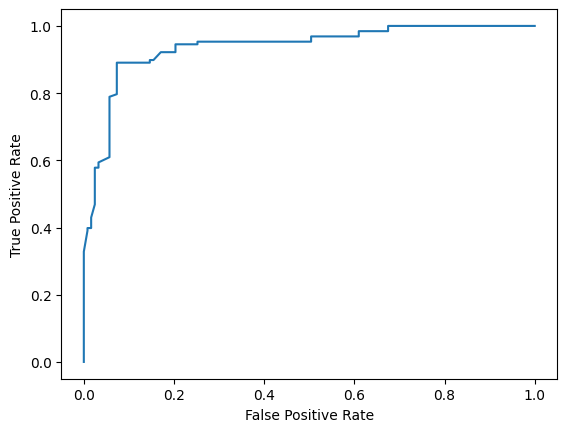

In [250]:
# Appel de la classification
clf_best = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 4, n_estimators = 4)

# Définition des variable
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# running search
clf_best.fit(X_train, Y_train)

# prediction
estimate_best = clf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,  estimate_best)
# Roc Curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Cross Validation

### Decision Tree

In [251]:
auc_list_decision_tree = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = DecisionTreeClassifier(
        criterion= 'entropy',
        max_depth = 4,
        max_leaf_nodes = 20, 
        min_samples_leaf = 20,
        min_samples_split = 20
    )
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list_decision_tree.append(auc_cv)

    #Moyenne des AUC
    mean_auc_decision_tree = np.mean(auc_list_decision_tree)

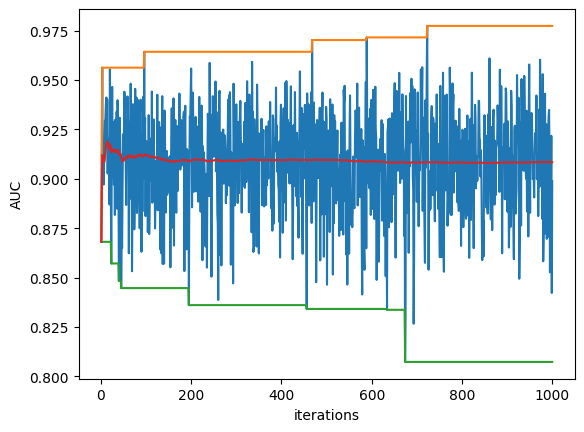

In [252]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list_decision_tree[:i+1]) for i in range(len(auc_list_decision_tree))]
cum_min_list = [min(auc_list_decision_tree[:i+1]) for i in range(len(auc_list_decision_tree))]
cum_mean_list = [np.mean(auc_list_decision_tree[:i+1]) for i in range(len(auc_list_decision_tree))]

plt.plot(iterations,auc_list_decision_tree)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()

### Logistic Regression

In [253]:
auc_list_logistic_regression = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = LogisticRegression(C = 100, fit_intercept = True, max_iter = 200, penalty = 'l2', solver = 'lbfgs')
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list_logistic_regression.append(auc_cv)

    #Moyenne des AUC
    mean_auc_logistic_regression = np.mean(auc_list_logistic_regression)

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

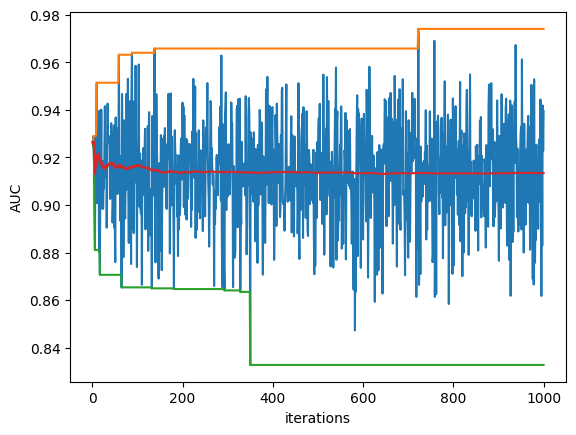

In [254]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list_logistic_regression[:i+1]) for i in range(len(auc_list_logistic_regression))]
cum_min_list = [min(auc_list_logistic_regression[:i+1]) for i in range(len(auc_list_logistic_regression))]
cum_mean_list = [np.mean(auc_list_logistic_regression[:i+1]) for i in range(len(auc_list_logistic_regression))]

plt.plot(iterations,auc_list_logistic_regression)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()

### Random Forest

In [255]:
auc_list_random_forest = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 4, n_estimators = 4)
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list_random_forest.append(auc_cv)

    #Moyenne des AUC
    mean_auc_random_forest = np.mean(auc_list_random_forest)

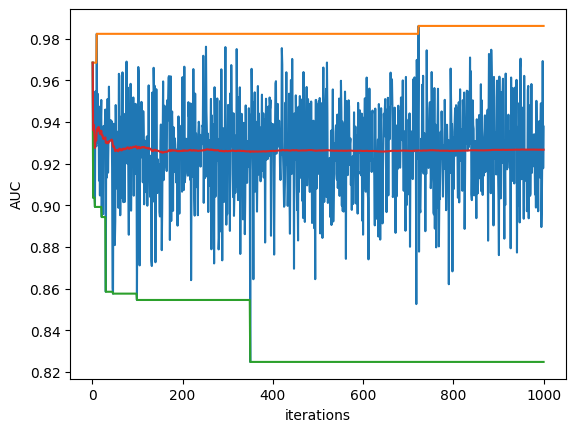

In [256]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list_random_forest[:i+1]) for i in range(len(auc_list_random_forest))]
cum_min_list = [min(auc_list_random_forest[:i+1]) for i in range(len(auc_list_random_forest))]
cum_mean_list = [np.mean(auc_list_random_forest[:i+1]) for i in range(len(auc_list_random_forest))]

plt.plot(iterations,auc_list_random_forest)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()

In [257]:
print("Decision tree : ", mean_auc_decision_tree)
print("Logistic Regression :", mean_auc_logistic_regression)
print("Random Forest : ", mean_auc_random_forest)

mean_auc_dict = {
    "Decision Tree": mean_auc_decision_tree,
    "Logistic Regression": mean_auc_logistic_regression,
    "Random Forest": mean_auc_random_forest
}

print("\nL'algorithme qui a la meilleure précision en moyenne est :", max(mean_auc_dict, key=mean_auc_dict.get))

Decision tree :  0.9083631725945542
Logistic Regression : 0.9134417500240263
Random Forest :  0.926683491161584

L'algorithme qui a la meilleure précision en moyenne est : Random Forest
